In [201]:
import pandas as pd
import numpy as np

from scipy.stats import zscore
from sklearn.preprocessing import normalize
    
# data = pd.read_csv("/Users/yfukuzaw/workspace/koe/tmi-asc-unlabel-nxfeature-weighted.tsv", sep='\t')
data = pd.read_csv("/tmp/blah6.tsv", sep='\t')
header = data.columns

In [202]:
def normalized(a, axis=0):
    a_min = np.min(a, axis=axis)
    a_max = np.max(a, axis=axis)
    return (a - a_min) / (a_max - a_min)

def get_columns(data, column_prefix=None, column_suffix=None, index_col_name='Cutoff', normalise=True):
    if column_prefix is None and column_suffix is None:
        raise Exception('column_prefix and column_suffix cannot be both None')
    columns = {index_col_name:data[index_col_name],}
    for colname in header:
        name_to_add = None
#         print('column_prefix = ' + column_prefix + ' colname = ' + colname)
        if column_prefix is not None and colname.startswith(column_prefix):
            name_to_add = colname[len(column_prefix):]
#             print('name_to_add = ' + name_to_add)
        if column_suffix is not None and colname.endswith(column_suffix):
            if name_to_add is None:
                name_to_add = colname
            name_to_add = name_to_add[:len(name_to_add)-len(column_suffix)]
        if name_to_add is not None:
            if column_prefix is not None and name_to_add == '':
                name_to_add = column_prefix
#                 print('name_to_add = ' + name_to_add)
            elif column_suffix is not None and name_to_add == '':
                name_to_add = column_suffix
            
            if name_to_add[0] == '_':
                name_to_add = name_to_add[1:]
            if name_to_add[-1] == '_':
                name_to_add = name_to_add[:-1]
            if normalise:
                columns[name_to_add] = normalized(data[colname], axis=0)
            else:
                columns[name_to_add] = data[colname]
    return pd.DataFrame(columns)
    

In [203]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)
    
def plot_figure_by_type(index_col_name, figure_type, is_prefix, normalise=True, pdf=None):
    if pdf is None:
        plt.ion()
    else:
        plt.ioff()
    fig = plt.figure()
    ax = plt.gca()
    if is_prefix:
        prefix = figure_type
        suffix = None
    else:
        prefix = None
        suffix = figure_type
    
    ax.set_title(figure_type)
    set_size(14,8, ax)
    df = get_columns(data, prefix, suffix, index_col_name, normalise)
    for column in df.head():
        if column != index_col_name:
            df.plot(kind='line',x=index_col_name,y=column,ax=ax)
    if pdf is None:
        plt.show()
    else:
        pdf.savefig(fig)
        plt.close()
    return df
    

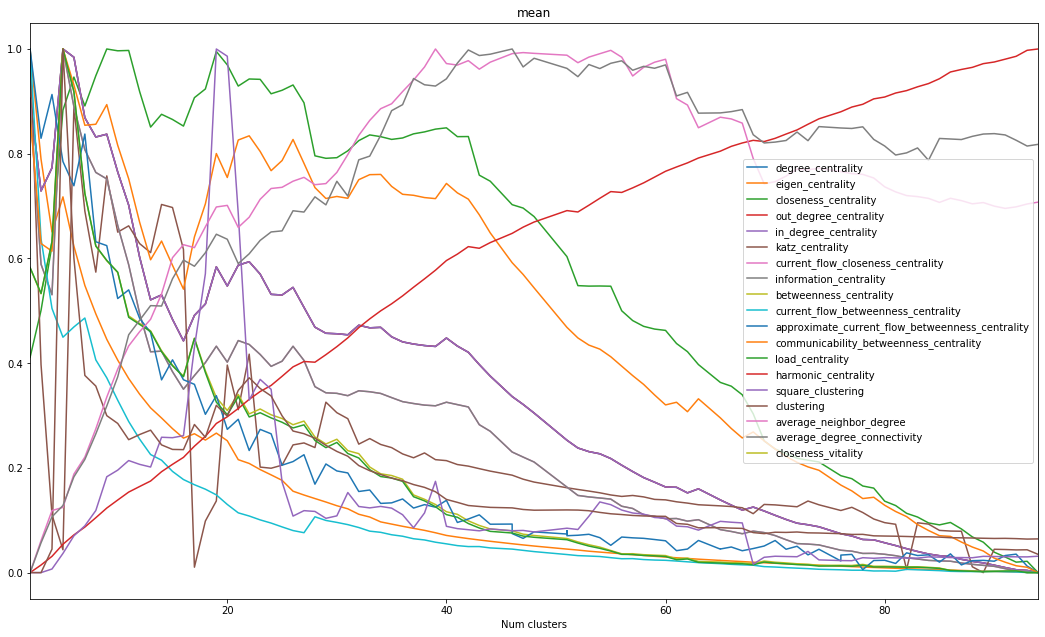

In [204]:
index_col_name='Num clusters'
df = plot_figure_by_type(index_col_name, figure_type='mean', is_prefix=False, normalise=True)



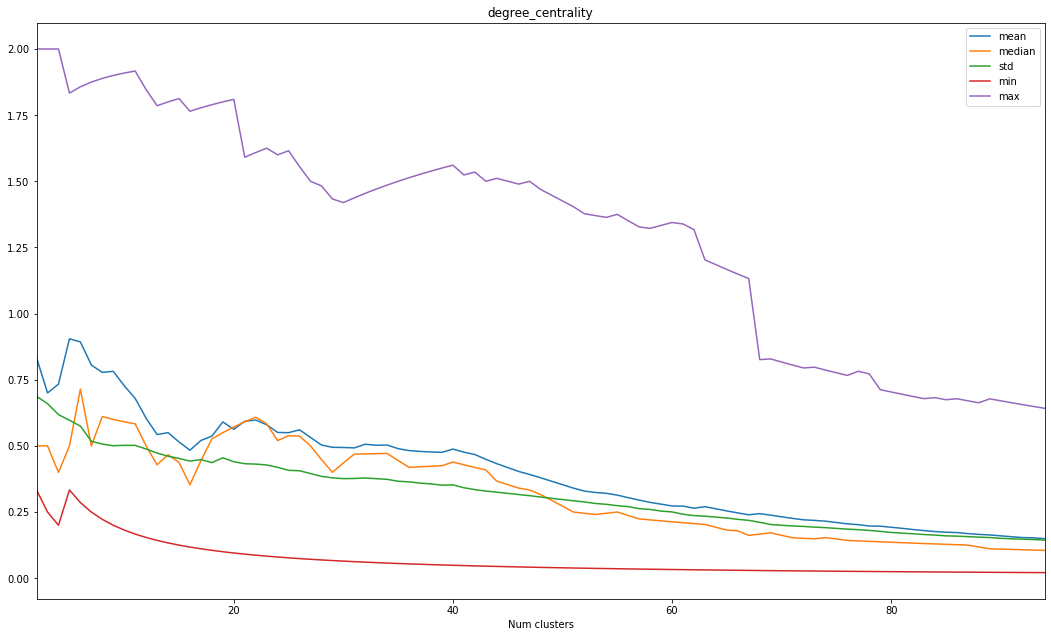

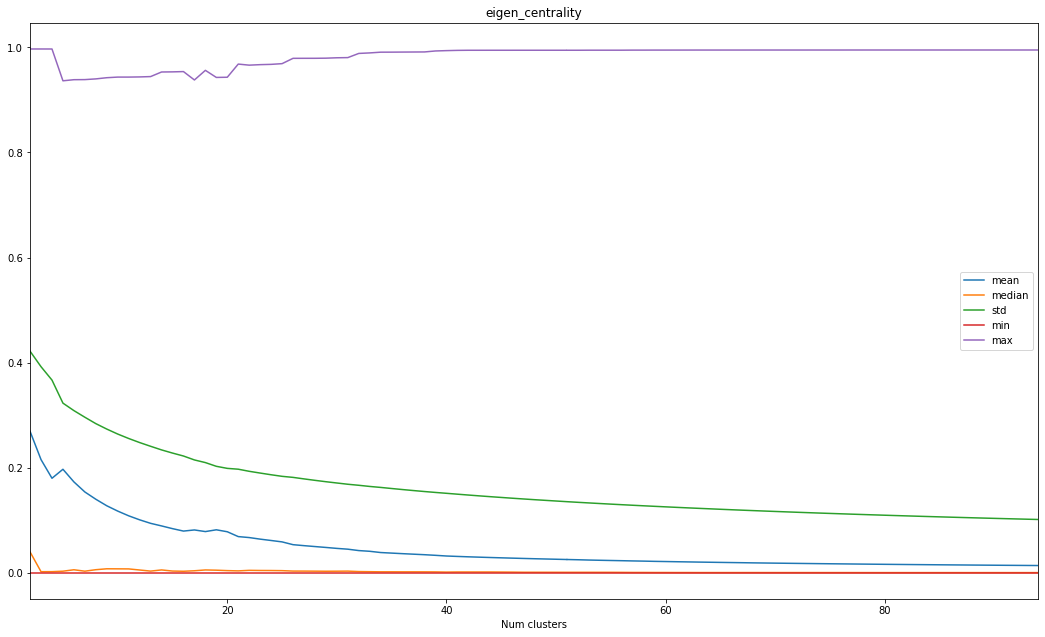

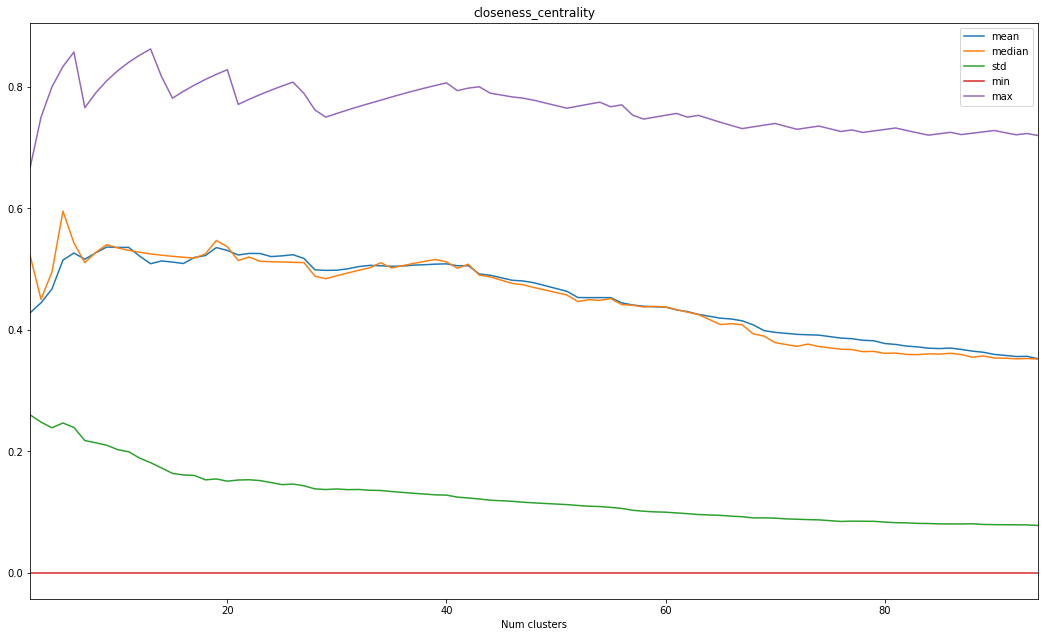

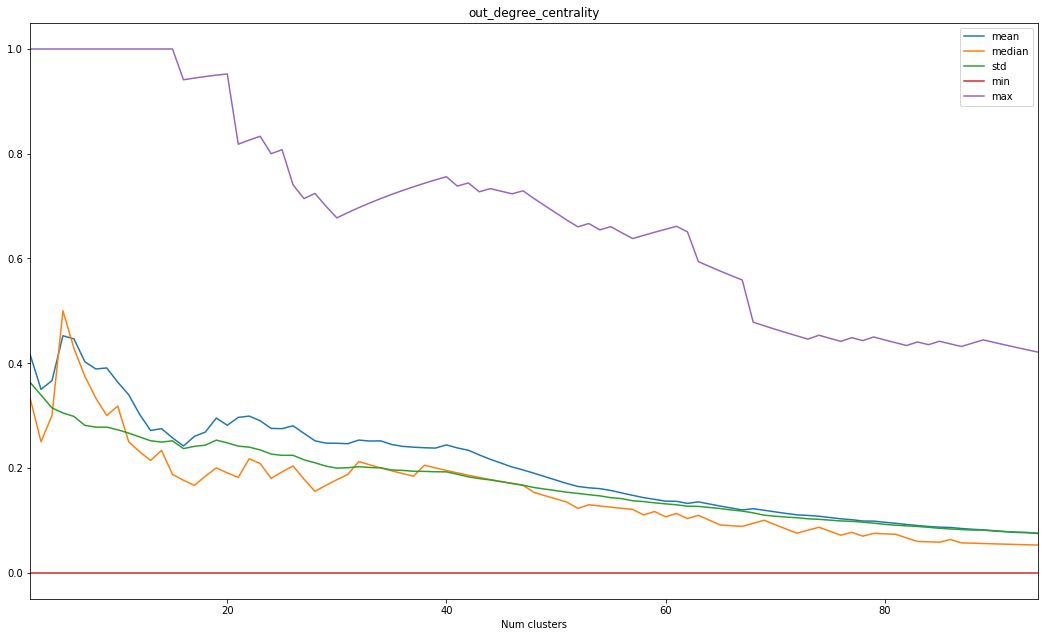

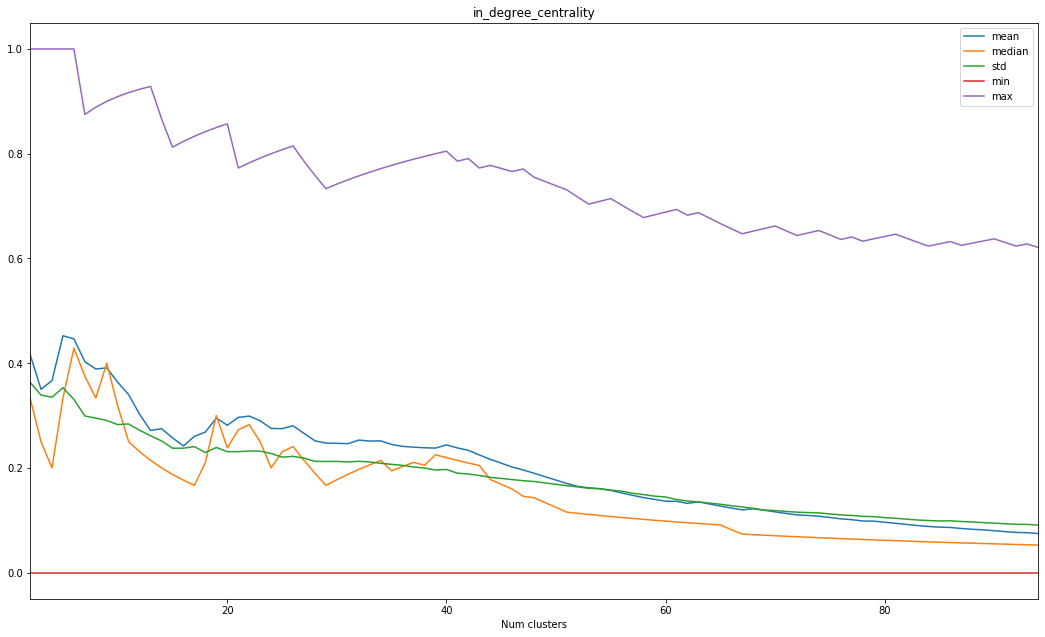

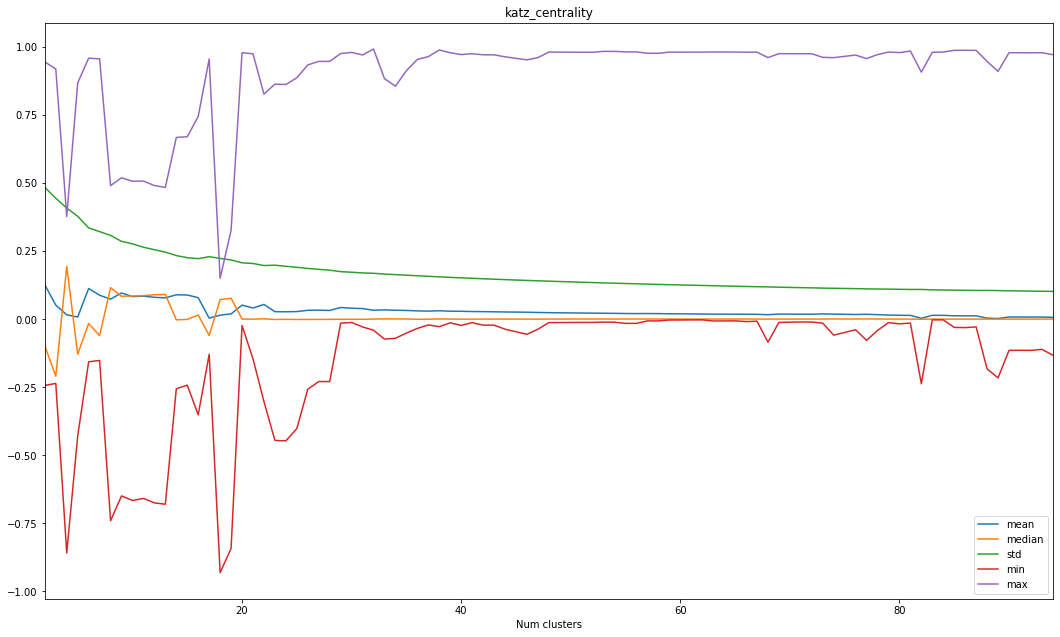

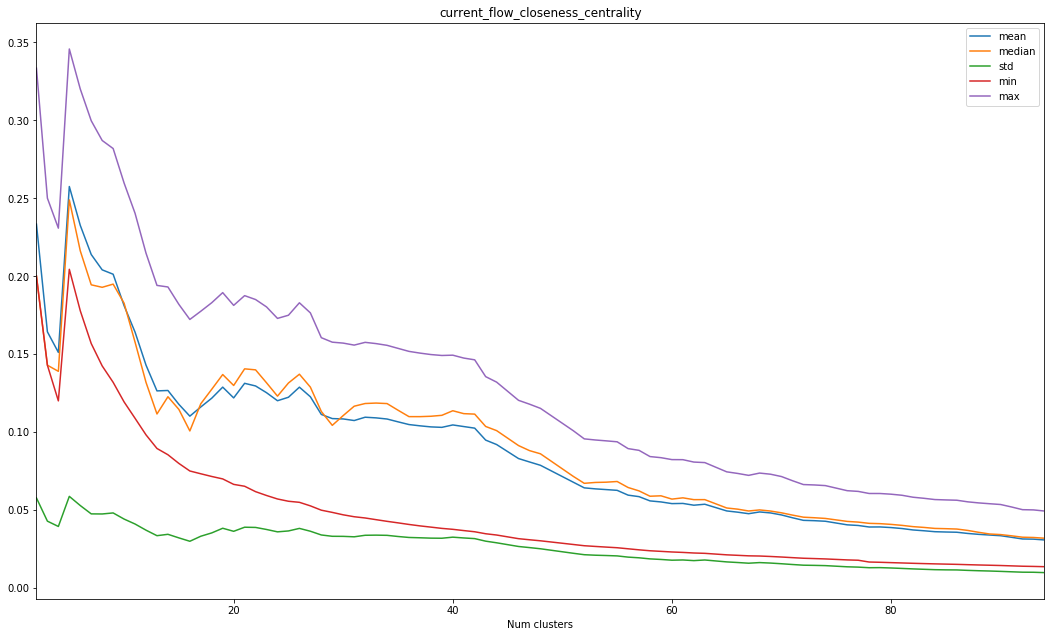

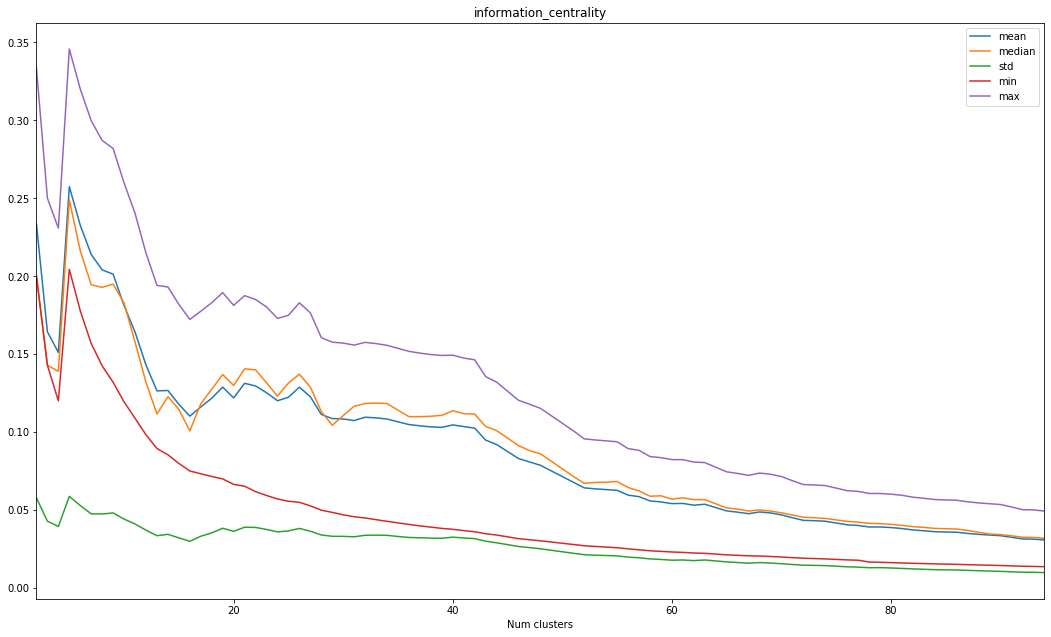

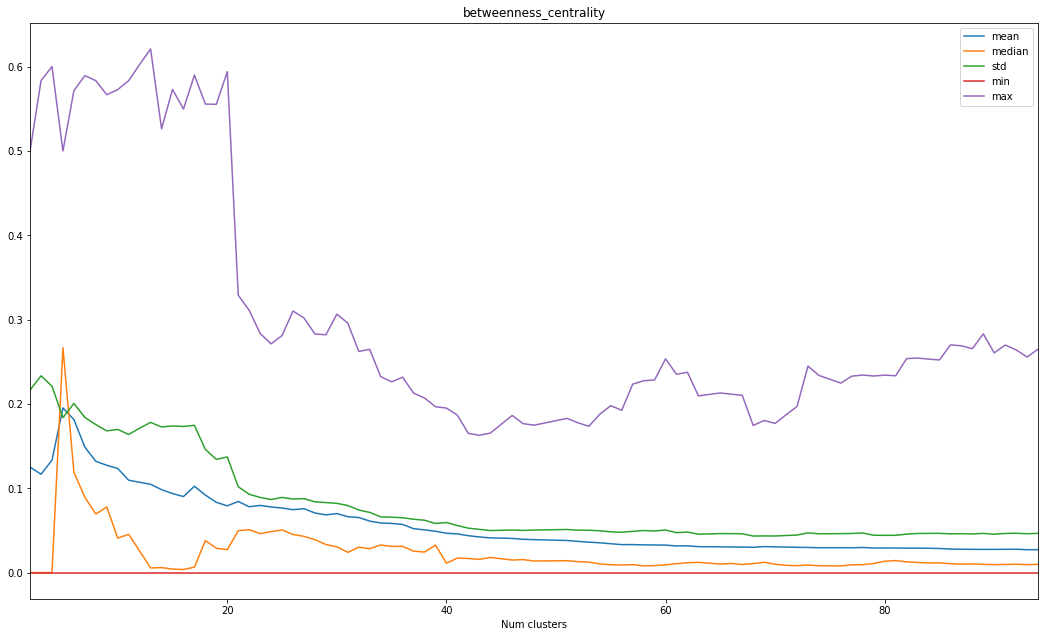

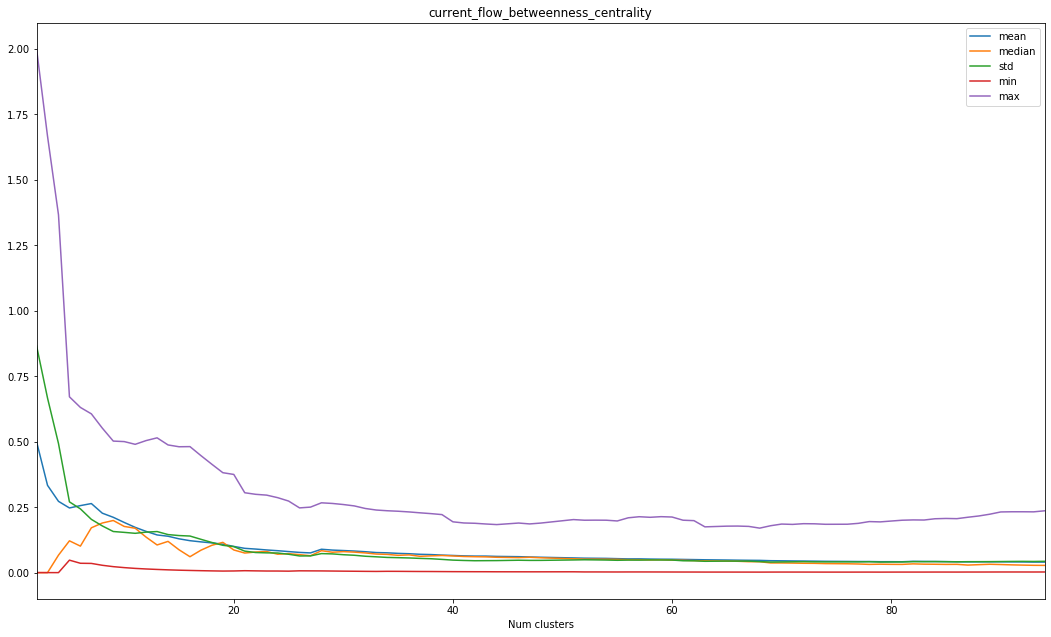

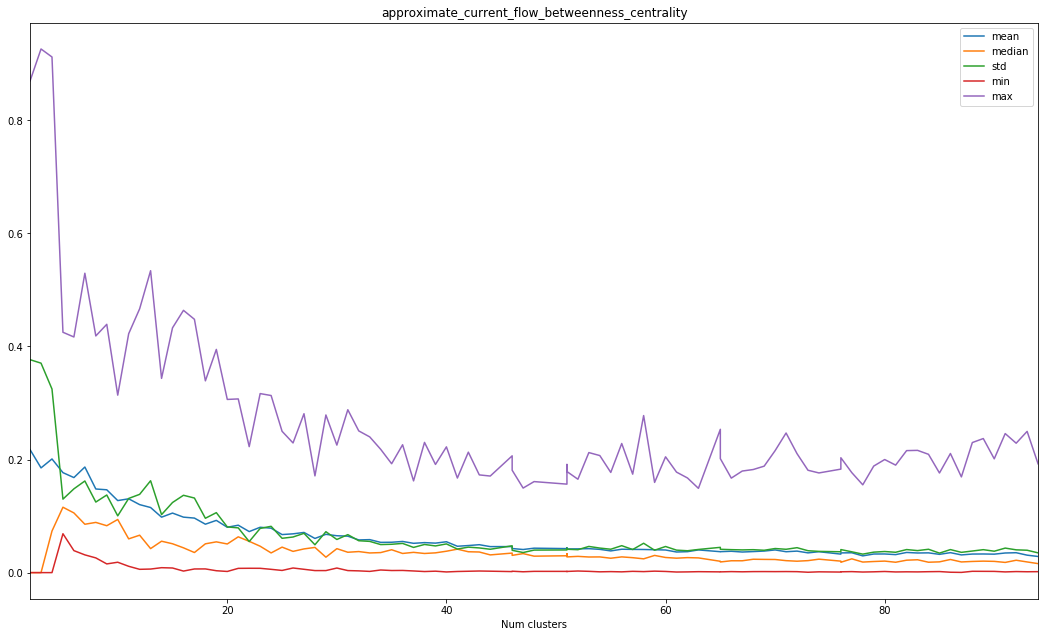

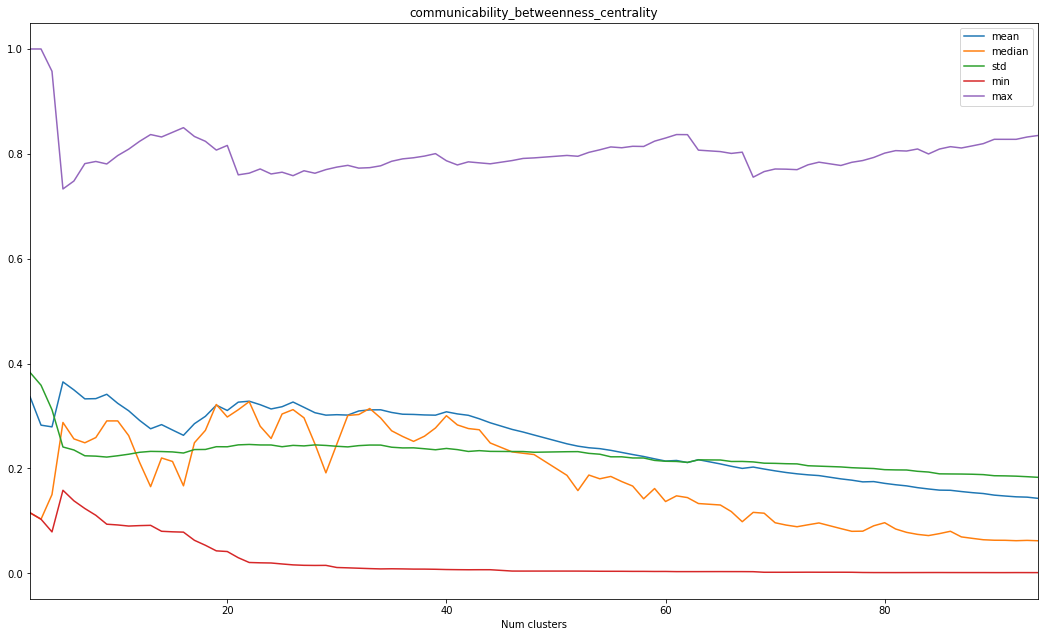

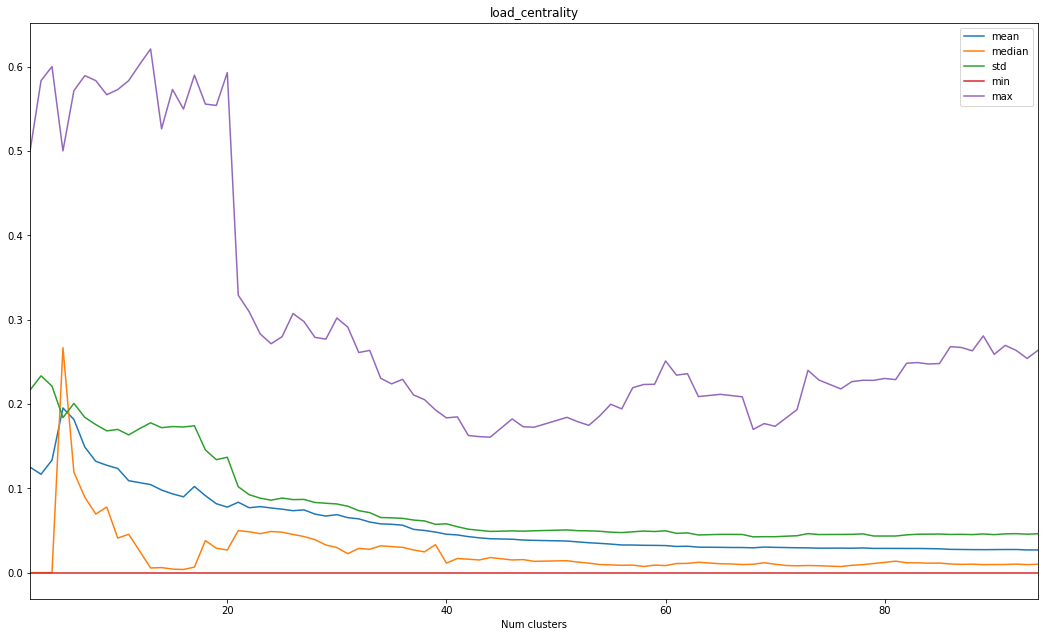

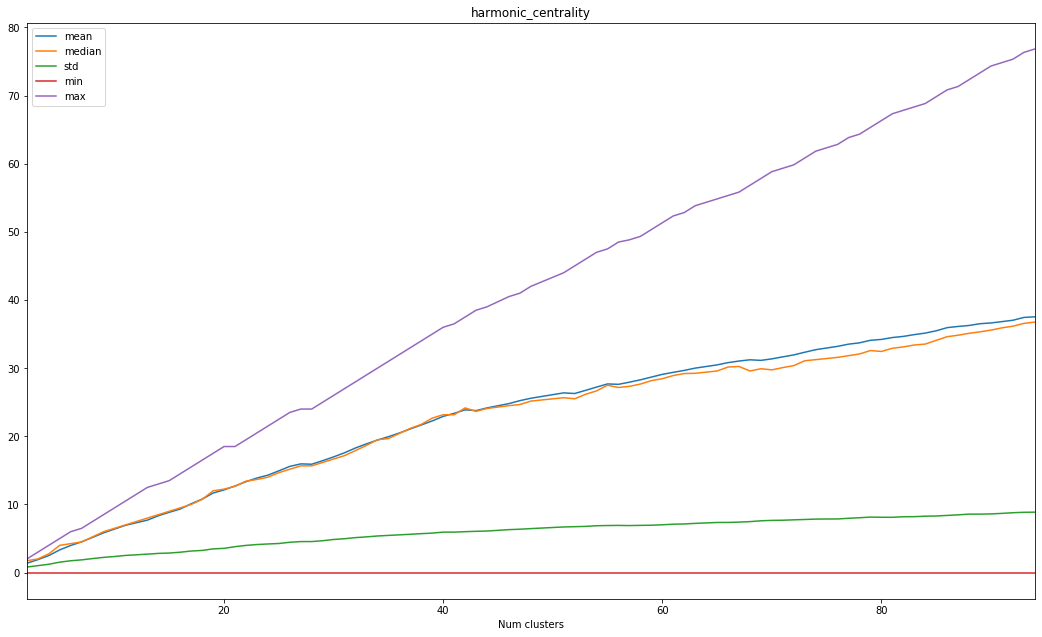

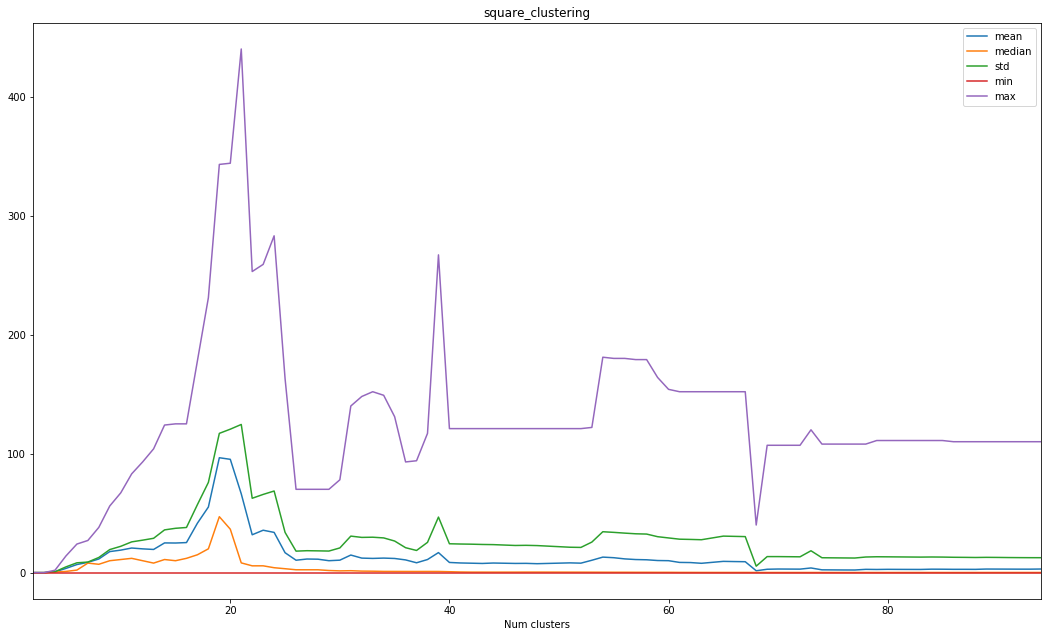

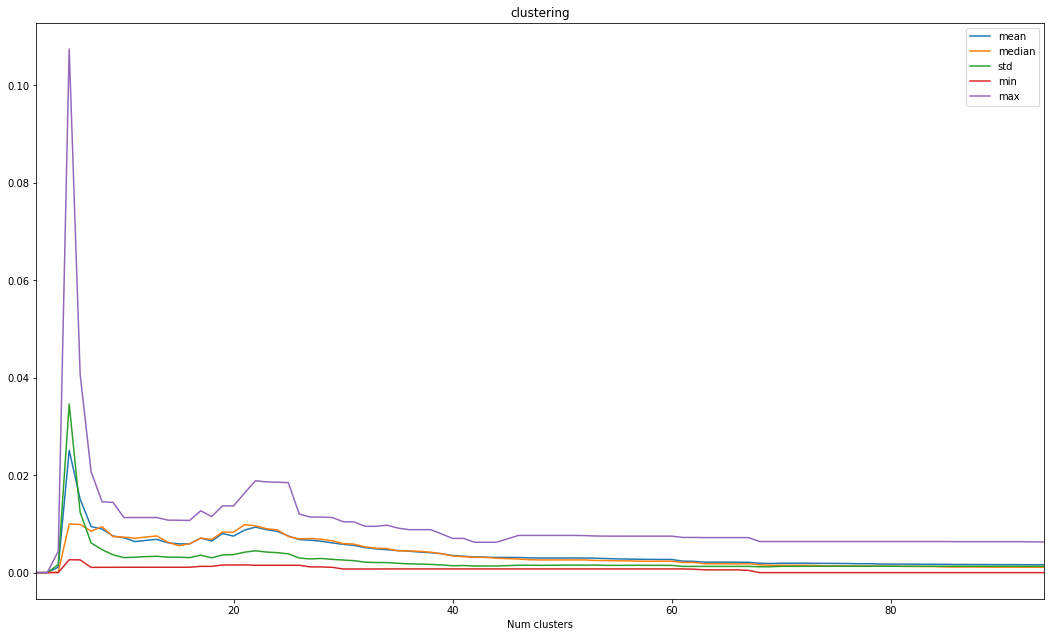

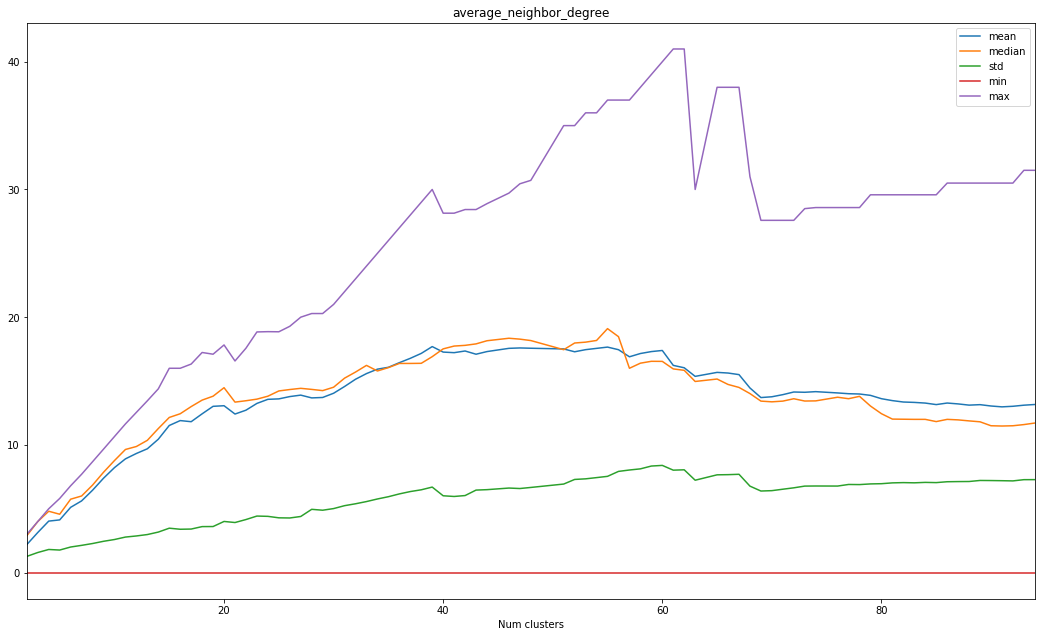

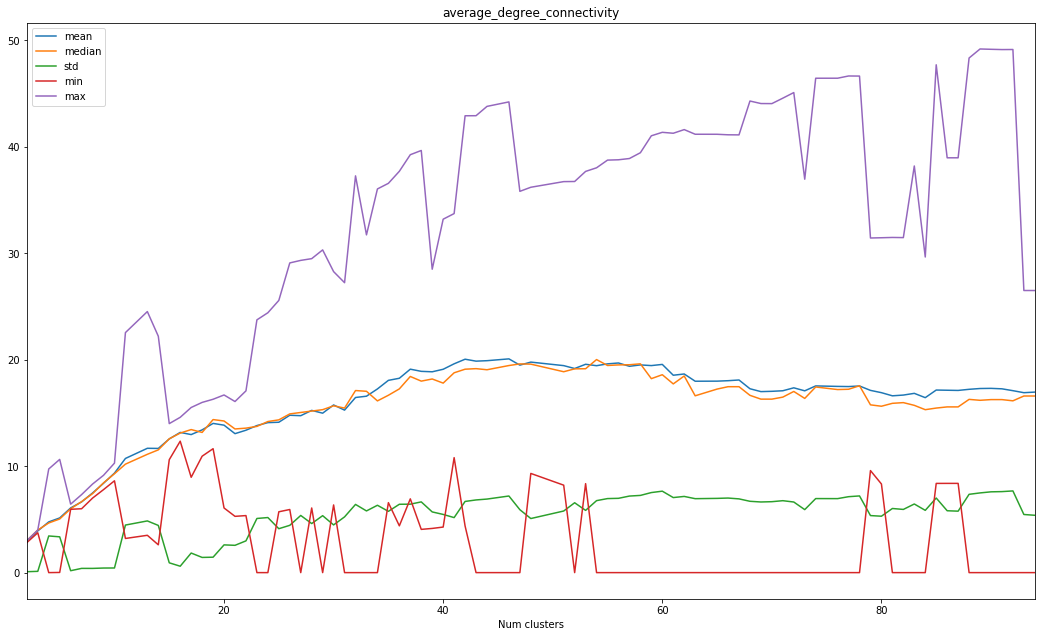

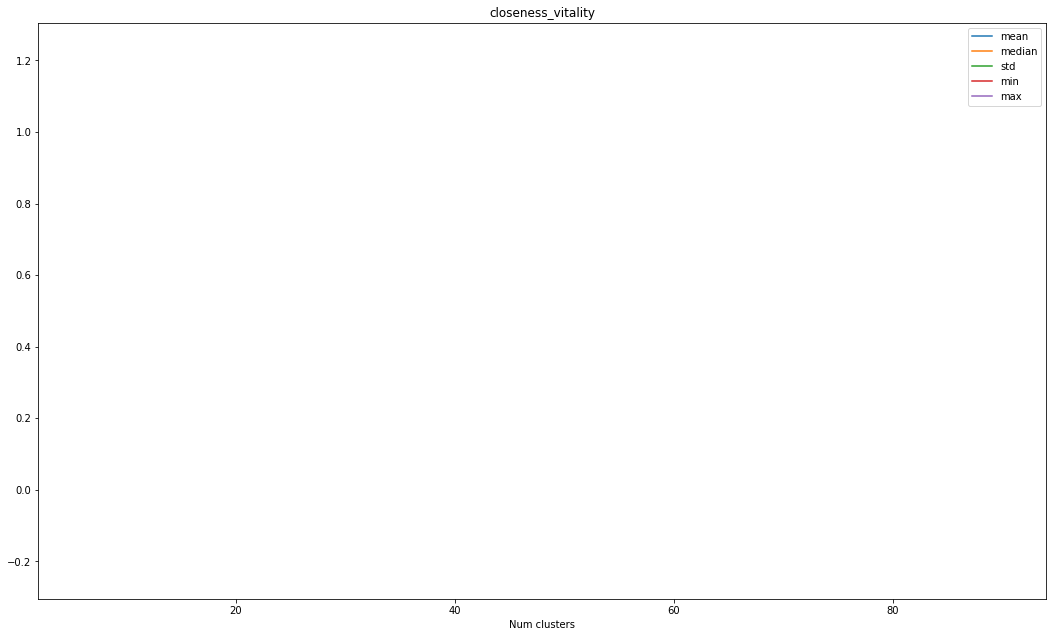

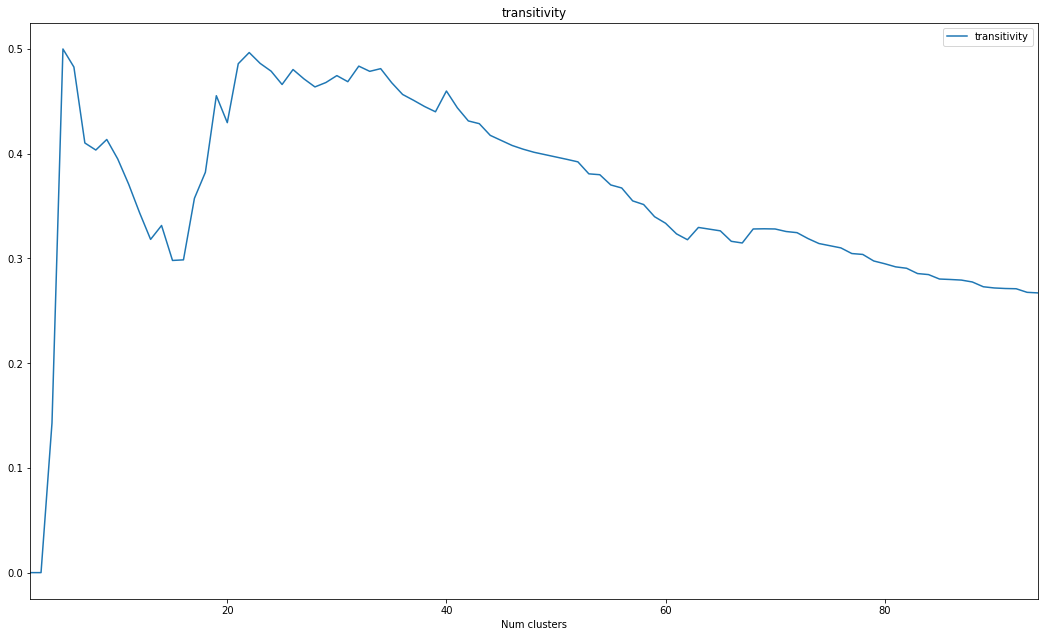

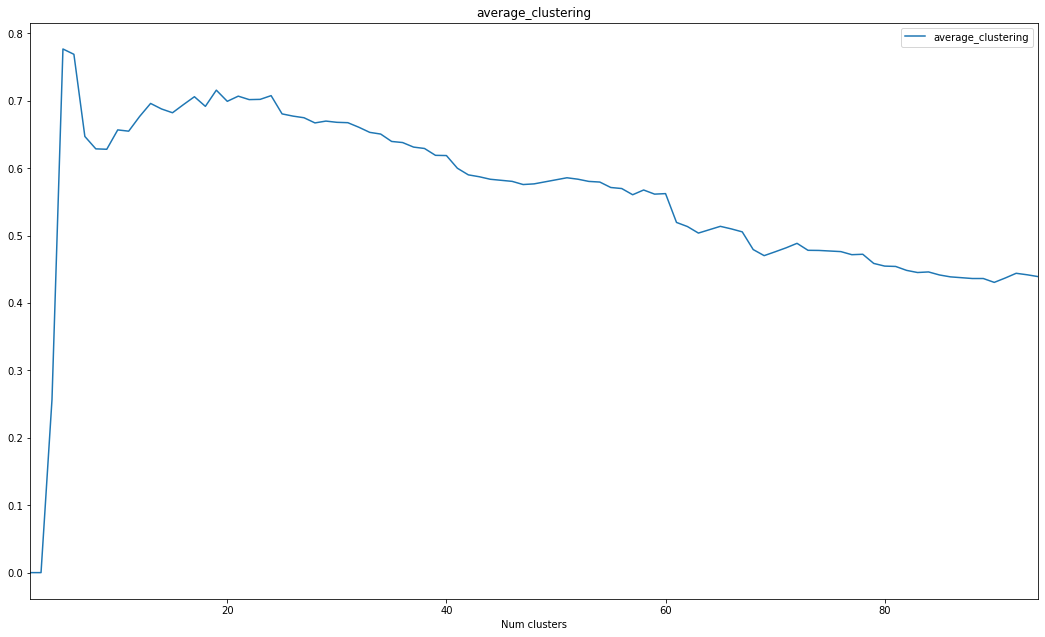

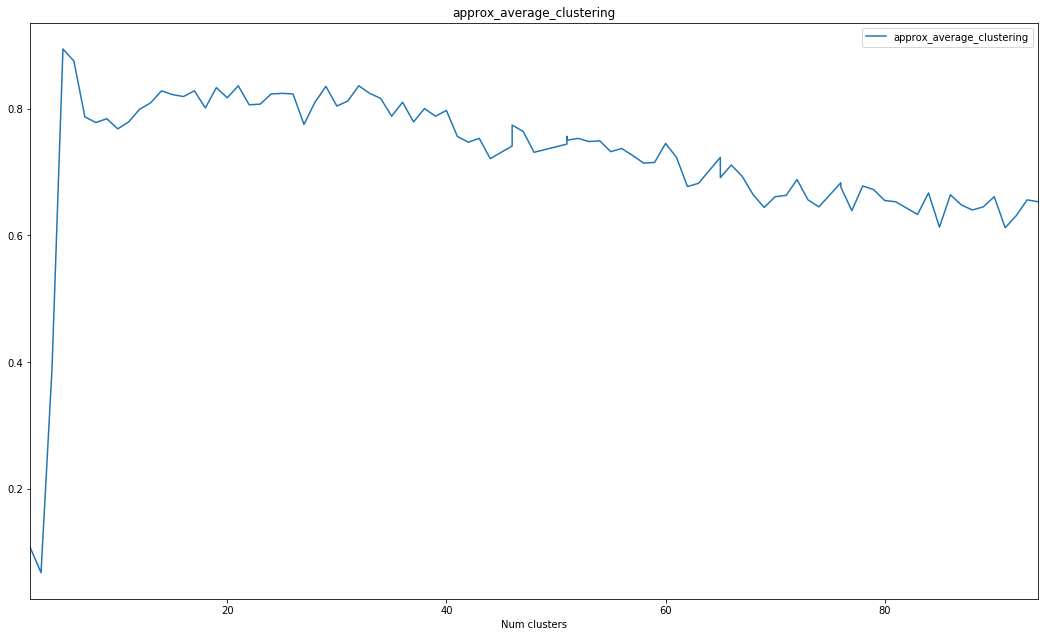

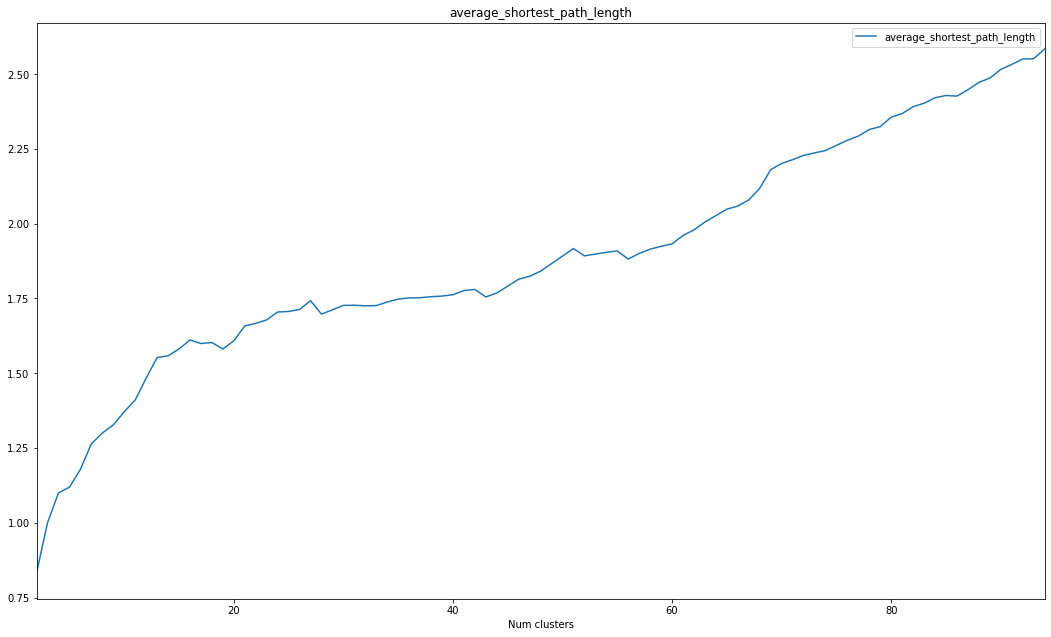

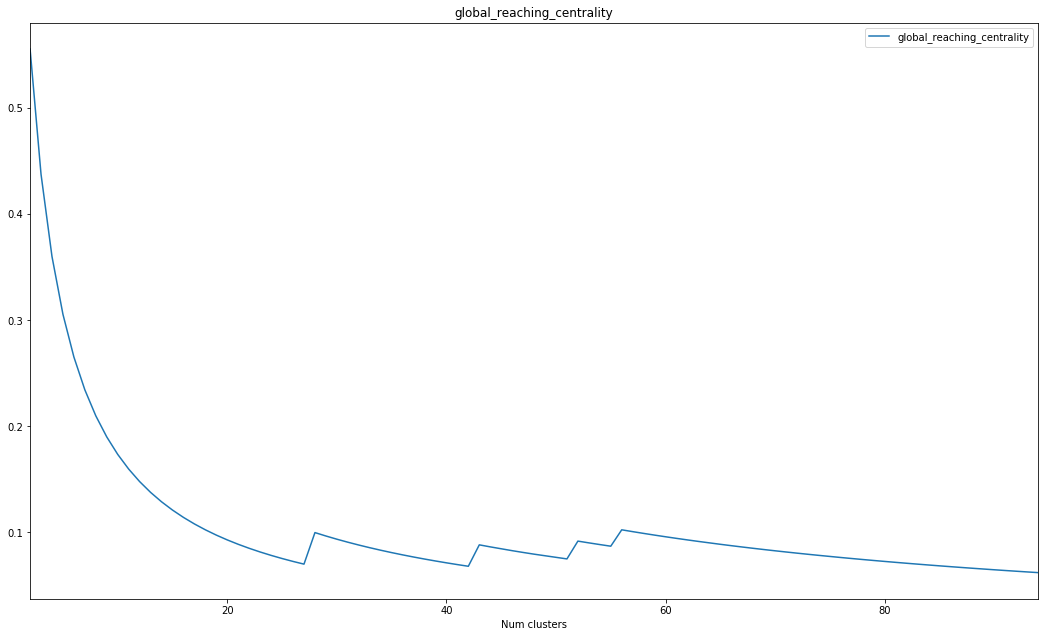

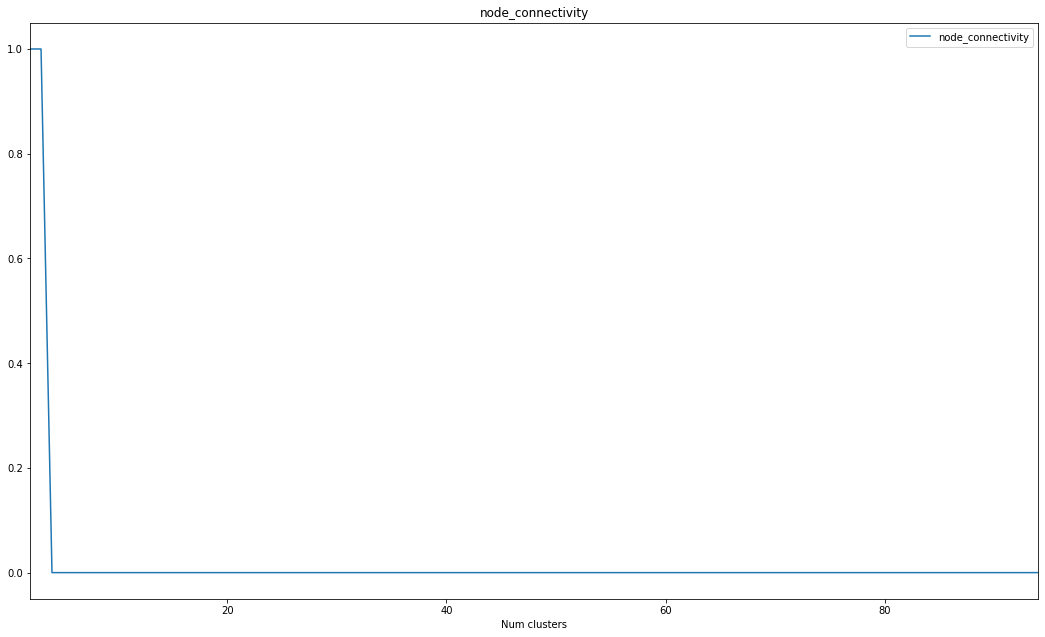

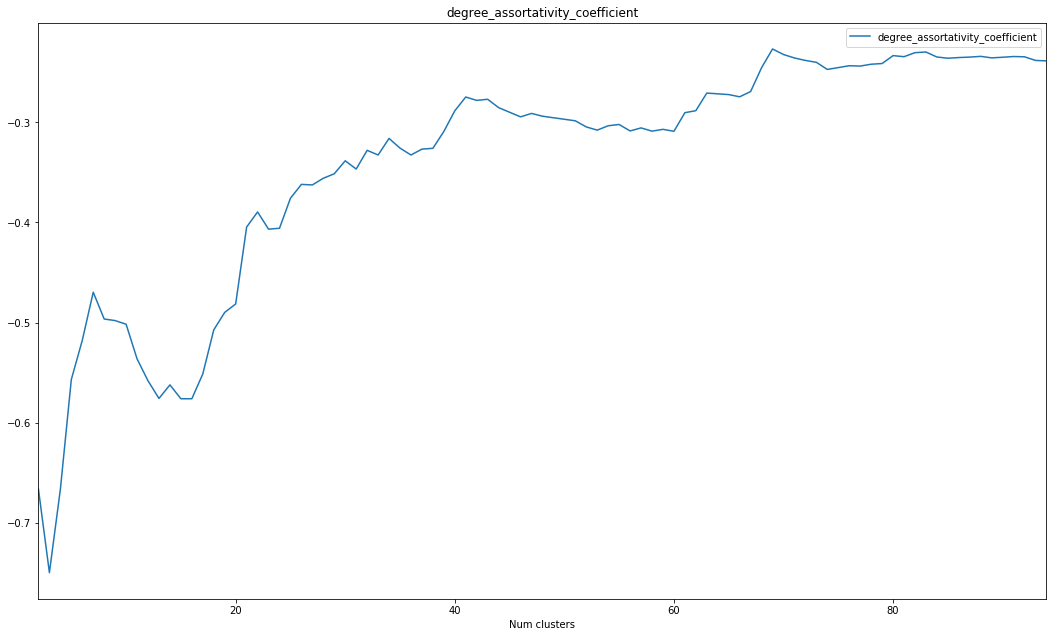

AttributeError: 'NoneType' object has no attribute 'finalize'

In [205]:
# pdf = PdfPages('unlabel_by_measurement_type-weighted.pdf')
# pdf = PdfPages('wesley_adjacency_by_measurement_type-weighted.pdf')

for figure_type in ['degree_centrality', 'eigen_centrality', 'closeness_centrality', 'out_degree_centrality', 
                    'in_degree_centrality', 'katz_centrality', 'current_flow_closeness_centrality', 
                    'information_centrality', 'betweenness_centrality', 'current_flow_betweenness_centrality', 
                    'approximate_current_flow_betweenness_centrality', 'communicability_betweenness_centrality', 
                    'load_centrality', 'harmonic_centrality', 'square_clustering', 'clustering', 
                    'average_neighbor_degree', 'average_degree_connectivity',
                    'closeness_vitality', 'transitivity', 'average_clustering', 'approx_average_clustering', 
                    'average_shortest_path_length', 'global_reaching_centrality', 'node_connectivity', 
                    'degree_assortativity_coefficient']:
#     index_col_name='Cutoff'
#     plot_figure_by_type(index_col_name, figure_type, is_prefix=True)
    index_col_name='Num clusters'
    plot_figure_by_type(index_col_name, figure_type, is_prefix=True, normalise=False, pdf=None)

pdf.close()

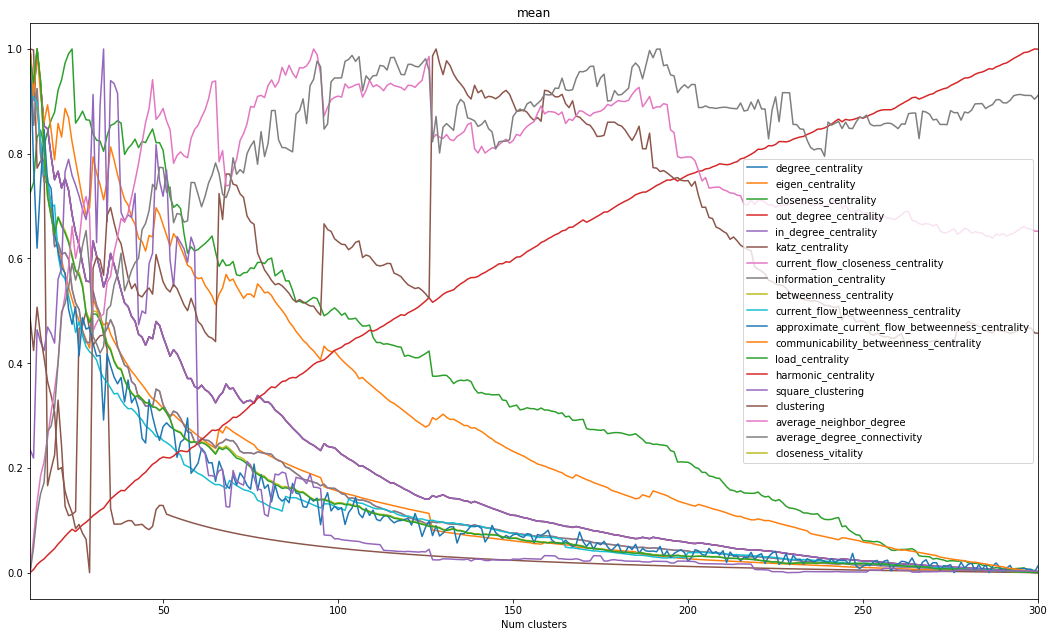

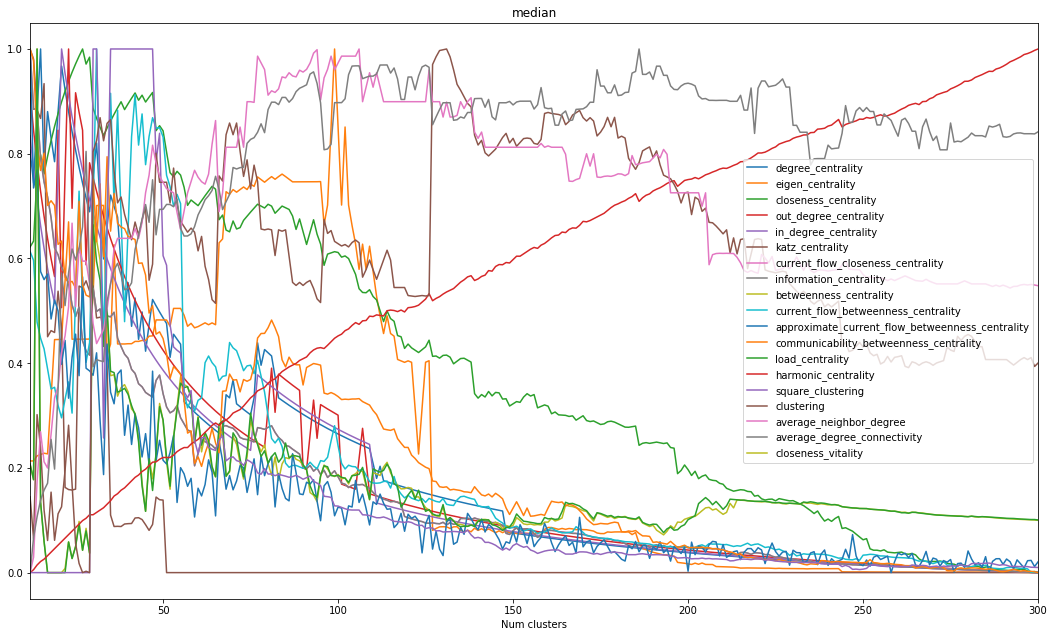

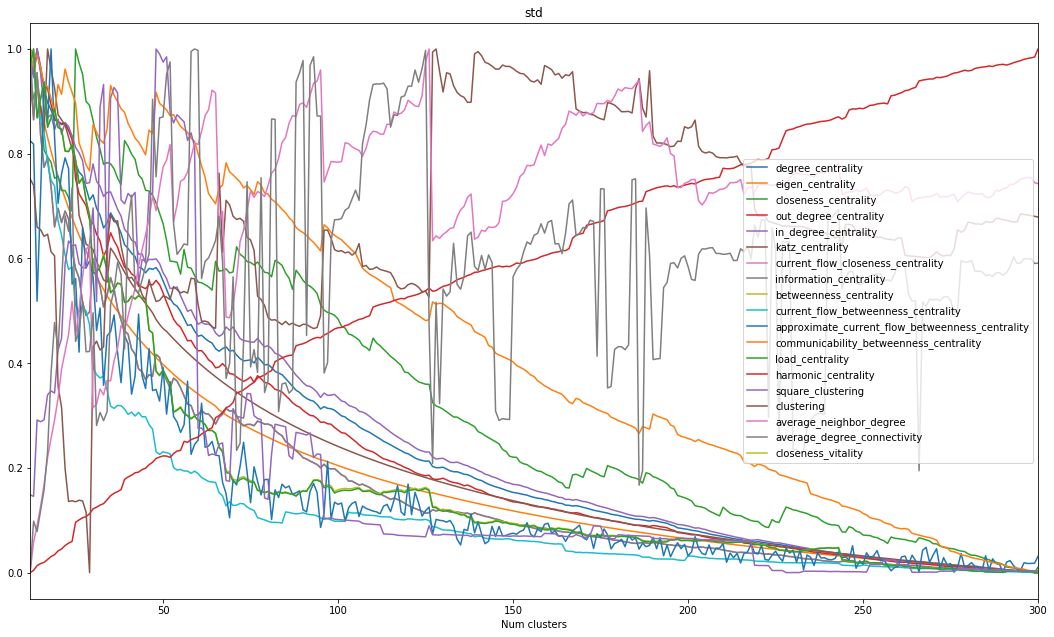

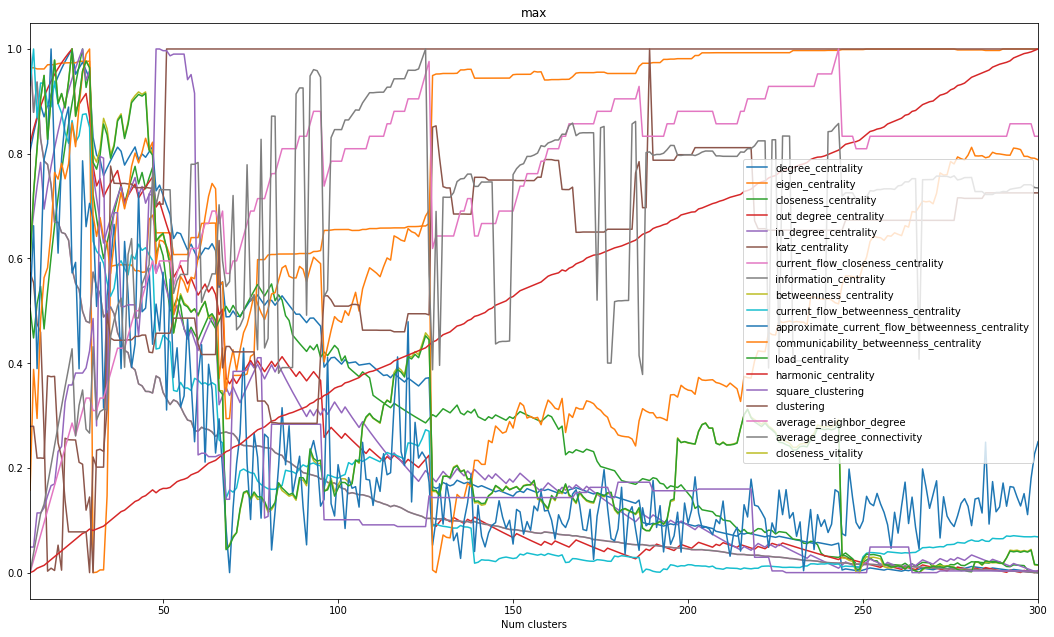

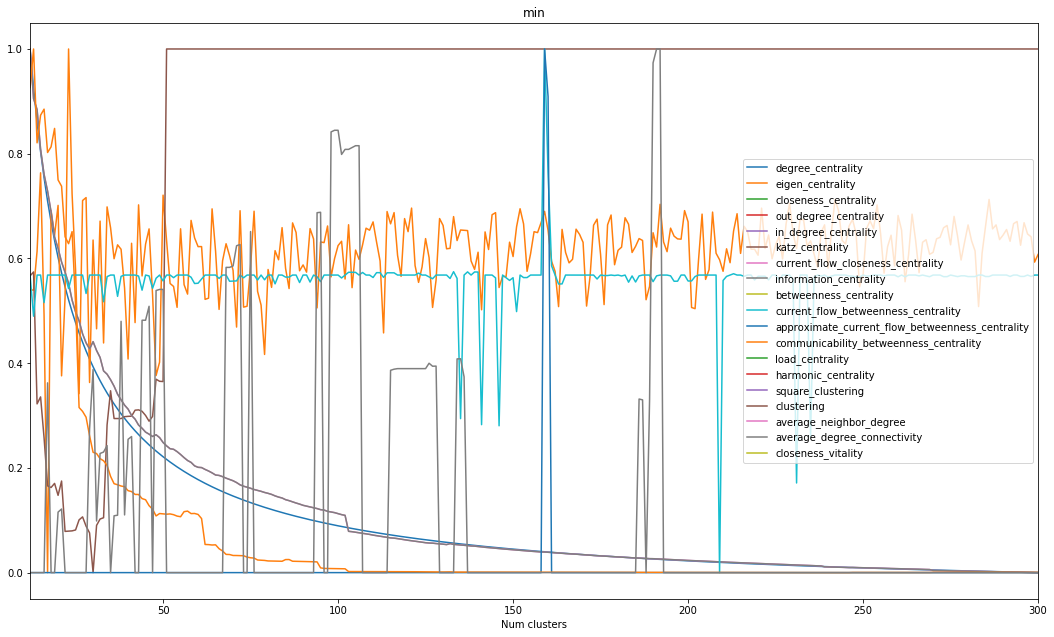

AttributeError: 'NoneType' object has no attribute 'finalize'

In [190]:
# pdf = PdfPages('unlabel_by_stats-weighted.pdf')

for figure_type in ['mean', 'median', 'std', 'max', 'min']:
    index_col_name='Num clusters'
    plot_figure_by_type(index_col_name, figure_type, is_prefix=False, normalise=True, pdf=None)

pdf.close()